# 🌍 Air Quality Analysis – Exploratory Data Analysis (EDA)
**Author**: Shivangi Gupta  
**Date**: June 11, 2025  
**Role**: Data Analyst   

## Objective
Air pollution in New York City varies widely across neighborhoods and seasons, exposing vulnerable populations—such as children, the elderly, and those with pre-existing conditions—to harmful levels of PM2.5, NO₂, and O₃. These exposures are linked to increased emergency department visits, hospitalizations, and deaths.

## Project Background
Air pollution refers to the presence of harmful substances in the air—both outdoors and indoors—that pose risks to human health, other living beings, and the environment. These pollutants can include gases such as ozone (O₃) and nitrogen dioxide (NO₂), as well as fine particulate matter like PM2.5, soot, and dust.

In a city as diverse and densely populated as New York, exposure to these pollutants varies widely across neighborhoods. Factors such as traffic density, building emissions, infrastructure, and socio-economic conditions significantly influence the air quality experienced by different communities.

## Focus Areas and Key Questions
|Focus Area                    |                Key Question                                                                                 |
|------------------------------|-------------------------------------------------------------------------------------------------|
|**Air Quality Trends:**       | How have pollutant levels (PM2.5, NO₂, O₃) changed over time and by season?                     |
| **Geographic Disparities:**  | Which neighborhoods experience the worst air quality and health outcomes?                       |
|**Health Outcomes:**          | Are emergency visits, hospitalizations, and deaths increasing or decreasing?                     |
| **Cause Attribution:**       | Which pollutants are most associated with asthma, cardiovascular, or respiratory conditions?     |

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

"""  LOADING DATASET """
data = pd.read_csv(r"D:\SHIVANGI\MySQL Projects\New folder\Air_Quality.csv", encoding='utf-8') ## decodes the encoded text back to normal unicode format.

data  ## Dataset View

Unique ID  Indicator ID                    Name Measure Measure Info  \
0         336867           375  Nitrogen dioxide (NO2)    Mean          ppb   
1         336741           375  Nitrogen dioxide (NO2)    Mean          ppb   
2         550157           375  Nitrogen dioxide (NO2)    Mean          ppb   
3         412802           375  Nitrogen dioxide (NO2)    Mean          ppb   
4         412803           375  Nitrogen dioxide (NO2)    Mean          ppb   
...          ...           ...                     ...     ...          ...   
18857     165993           375  Nitrogen dioxide (NO2)    Mean          ppb   
18858     338255           386              Ozone (O3)    Mean          ppb   
18859     651029           386              Ozone (O3)    Mean          ppb   
18860     667628           375  Nitrogen dioxide (NO2)    Mean          ppb   
18861     167586           375  Nitrogen dioxide (NO2)    Mean          ppb   

      Geo Type Name  Geo Join ID                         Geo Place Name  \
0                CD          407          Flushing and Whitestone (CD7)   
1                CD          107                  Upper West Side (CD7)   
2                CD          414      Rockaway and Broad Channel (CD14)   
3                CD          407          Flushing and Whitestone (CD7)   
4                CD          407          Flushing and Whitestone (CD7)   
...             ...          ...                                    ...   
18857            CD          207  Kingsbridge Heights and Bedford (CD7)   
18858            CD          107                  Upper West Side (CD7)   
18859            CD          307                      Sunset Park (CD7)   
18860            CD          207  Kingsbridge Heights and Bedford (CD7)   
18861            CD          207  Kingsbridge Heights and Bedford (CD7)   

               Time Period       Start_Date  Year    Month  Data Value  \
0           Winter 2014-15  12 January 2014  2014  January       23.97   
1           Winter 2014-15  12 January 2014  2014  January       27.42   
2      Annual Average 2017  01 January 2017  2017  January       12.55   
3           Winter 2015-16  12 January 2015  2015  January       22.63   
4              Summer 2016  06 January 2016  2016  January       14.00   
...                    ...              ...   ...      ...         ...   
18857       Winter 2012-13  12 January 2012  2012  January       25.78   
18858          Summer 2015  06 January 2015  2015  January       28.13   
18859          Summer 2019  06 January 2019  2019  January       28.78   
18860       Winter 2019-20  12 January 2019  2019  January       23.68   
18861  Annual Average 2010  12 January 2009  2009  January       23.77   

       Unnamed: 13  Unnamed: 14  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
18857          NaN          NaN  
18858          NaN          NaN  
18859          NaN          NaN  
18860          NaN          NaN  
18861          NaN          NaN  

[18862 rows x 15 columns]

### 📄 Dataset Overview
The dataset contains air quality readings, possibly from different stations, timeframes, or pollutants. First, we'll inspect the structure.


In [2]:
## Removing Leading Trailing whitespaces
data.columns.str.strip()

## Removing Unnecessary Columns 
data = data.drop(['Unnamed: 13', 'Unnamed: 14'],axis = 1)
data.head()

Unique ID  Indicator ID                    Name Measure Measure Info  \
0     336867           375  Nitrogen dioxide (NO2)    Mean          ppb   
1     336741           375  Nitrogen dioxide (NO2)    Mean          ppb   
2     550157           375  Nitrogen dioxide (NO2)    Mean          ppb   
3     412802           375  Nitrogen dioxide (NO2)    Mean          ppb   
4     412803           375  Nitrogen dioxide (NO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                     Geo Place Name  \
0            CD          407      Flushing and Whitestone (CD7)   
1            CD          107              Upper West Side (CD7)   
2            CD          414  Rockaway and Broad Channel (CD14)   
3            CD          407      Flushing and Whitestone (CD7)   
4            CD          407      Flushing and Whitestone (CD7)   

           Time Period       Start_Date  Year    Month  Data Value  
0       Winter 2014-15  12 January 2014  2014  January       23.97  
1       Winter 2014-15  12 January 2014  2014  January       27.42  
2  Annual Average 2017  01 January 2017  2017  January       12.55  
3       Winter 2015-16  12 January 2015  2015  January       22.63  
4          Summer 2016  06 January 2016  2016  January       14.00

In [3]:
## summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18862 entries, 0 to 18861
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18862 non-null  int64  
 1   Indicator ID    18862 non-null  int64  
 2   Name            18862 non-null  object 
 3   Measure         18862 non-null  object 
 4   Measure Info    18862 non-null  object 
 5   Geo Type Name   18862 non-null  object 
 6   Geo Join ID     18862 non-null  int64  
 7   Geo Place Name  18862 non-null  object 
 8   Time Period     18862 non-null  object 
 9   Start_Date      18862 non-null  object 
 10  Year            18862 non-null  int64  
 11  Month           18862 non-null  object 
 12  Data Value      18862 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.9+ MB


### What do you know about dataset?

### Overview
- The dataset contains air quality surveillance data collected from neighborhoods across New York City.

- It includes common air pollutants, geographic information, and time-based trends, helping analyze health risks related to pollution.

### Data Structure
| Column Name     | Description                                                                                                                                               |
|-----------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique ID       | Unique record identifier                                                                                                                                  |
| Indicator ID    | Identifier of the type of measured value across time and space                                                                                            |
| Name            | Name of the indicator                                                                                                                                     |
| Measure         | How the indicator is measured                                                                                                                             |
| Measure Info    | Information (such as units) about the measure                                                                                                             |
| Geo Type Name   | 'UHF' stands for United Hospital Fund neighborhoods; For instance, Citywide, Borough, and Community Districts are different geography types              |
| Geo Join ID     | Identifier of the neighborhood geographic area, used for joining to mapping geography files to make thematic maps                                         |
| Geo Place Name  | Neighborhood name                                                                                                                                         |
| Time Period     | Description of the time that the data applies to; Could be a year, range of years, or season for example                                                  |
| Start_Date      | Date value for the start of the time_period; Always a date value; could be useful for plotting a time series                                              |
| Data Value      | The actual data value for this indicator, measure, place, and time                                                                              
### Geographical Scope
Based on the dataset and metadata, here's a breakdown of the geographic scope:

#### 1. Area Covered: New York City
The dataset covers all five boroughs of NYC:

- Manhattan
- Brooklyn
- Queens
- The Bronx
- Staten Island

#### 2. Geographic Unit: Community District (CD)
The primary geographical level appears to be the Community District (CD).

- Format: "Neighborhood Name (CDXX)"
   - Example: "East Harlem (CD11)", "Bushwick (CD4)"
- Each borough has multiple Community Districts:

|Borough	    |  CD Range      |
| ------------- | ---------------|
|Manhattan	    |  CD1 to CD12   |
|Brooklyn	    |  CD1 to CD18   |
|Queens	        |  CD1 to CD14   |
|The Bronx	    |  CD1 to CD12   |
|Staten Island	|  CD1 to CD3    |

### Understanding Air Quality Measurement Units

#### Concentration Units
- ppb (parts per billion): Measures the number of molecules of a pollutant per billion molecules of air. It's commonly used for gases like ozone, carbon monoxide, and nitrogen dioxide.

- mcg/m³ (micrograms per cubic meter): Represents the mass of a pollutant in micrograms present in one cubic meter of air. It's commonly used for particulate matter (PM2.5 and PM10).

- µg/m³ (micrograms per cubic meter): This is identical to mcg/m#³.

### Population-Based Units
- per 100,000 adults: This measures the number of occurrences of a specific air quality event (like asthma attacks or hospitalizations) per 100,000 adults in a population.

- per 100,000 children: Similar to the above, but for children.

- per 100,000: A general category that could refer to aduls, children, or a total p#opulation.

### Area-Based Unit
- per square mile: This measures the number of occurrences of an ir quality event per square #mile of area.

### Count Unit
- number: This is a simple count of occurrences without any specific unit of measurement.          |
                        |



In [4]:
for col in data.columns:             ## Check unique values in each column
    print(col)
    print(data[col].unique())
    print("----------------------------------------------------------")

Unique ID
[336867 336741 550157 ... 651029 667628 167586]
----------------------------------------------------------
Indicator ID
[375 365 640 386 657 643 650 648 661 642 641 655 647 646 653 659 644 645
 651 639 652]
----------------------------------------------------------
Name
['Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)'
 'Boiler Emissions- Total SO2 Emissions' 'Ozone (O3)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled'
 'Respiratory hospitalizations due to PM2.5 (age 20+)'
 'Asthma hospitalizations due to Ozone'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Asthma emergency departments visits due to Ozone'
 'Annual vehicle miles traveled (cars)'
 'Annual vehicle miles traveled (trucks)'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Deaths due to PM2.5' 'Cardiac and respiratory deaths due to Ozone']
--------------------

## Data Cleaning

In [5]:
## checking duplicate values
data.duplicated().sum()

## Removing duplicates 
data.drop_duplicates(inplace = True)

## Convert "start date" column datatype to datetime
data['Start_Date'] = pd.to_datetime(data['Start_Date'])

## Replace 'Âµg/m3' and "mcg/m3" to 'µg/m3'
data['Measure Info'] = data['Measure Info'].str.replace('Âµg/m3','µg/m3', regex = False).str.replace("mcg/m3","µg/m3", regex = False)

In [6]:
## Creating a new column "Category"

# Convert 'Name' to lowercase for consistent checking
data['Name_lower'] = data['Name'].str.lower()

# Define function to categorize
def categorize_type(name):
    if 'hospitalizations' in name:
        return 'Hospitalizations'
    elif 'deaths' in name:
        return 'Deaths'
    elif 'emergency department visits' in name or 'emergency departments visits' in name:
        return 'Emergency Department Visits'
    elif any(word in name for word in ['annual vehicle miles traveled']):
        return 'Travel Metrics'
    else:
        return 'Pollutant'

# Apply the function
data['category'] = data['Name_lower'].apply(categorize_type)

# Drop the helper lowercase column
data.drop(columns='Name_lower', inplace=True)

# Save or display the updated dataframe
print(data[['Name', 'category']].head())

                     Name   category
0  Nitrogen dioxide (NO2)  Pollutant
1  Nitrogen dioxide (NO2)  Pollutant
2  Nitrogen dioxide (NO2)  Pollutant
3  Nitrogen dioxide (NO2)  Pollutant
4  Nitrogen dioxide (NO2)  Pollutant


In [7]:
## Dropping "Geo Join ID", "Indicator ID"
data.drop(columns = ["Geo Join ID", "Indicator ID"], inplace  =True)

In [8]:
data.apply(lambda x: x.str.strip() if x.dtype == object else x)   ## Removing Any leading  Whitespaces present in categorical columns
data.head()

Unique ID                    Name Measure Measure Info Geo Type Name  \
0     336867  Nitrogen dioxide (NO2)    Mean          ppb            CD   
1     336741  Nitrogen dioxide (NO2)    Mean          ppb            CD   
2     550157  Nitrogen dioxide (NO2)    Mean          ppb            CD   
3     412802  Nitrogen dioxide (NO2)    Mean          ppb            CD   
4     412803  Nitrogen dioxide (NO2)    Mean          ppb            CD   

                      Geo Place Name          Time Period Start_Date  Year  \
0      Flushing and Whitestone (CD7)       Winter 2014-15 2014-01-12  2014   
1              Upper West Side (CD7)       Winter 2014-15 2014-01-12  2014   
2  Rockaway and Broad Channel (CD14)  Annual Average 2017 2017-01-01  2017   
3      Flushing and Whitestone (CD7)       Winter 2015-16 2015-01-12  2015   
4      Flushing and Whitestone (CD7)          Summer 2016 2016-01-06  2016   

     Month  Data Value   category  
0  January       23.97  Pollutant  
1  January       27.42  Pollutant  
2  January       12.55  Pollutant  
3  January       22.63  Pollutant  
4  January       14.00  Pollutant

In [9]:
for col in data.select_dtypes(include = 'object'):
    print(col)
    print(data[col].value_counts())
    print("--------------------------------------------------------------------------------")

Name
Name
Nitrogen dioxide (NO2)                                    6345
Fine particles (PM 2.5)                                   6345
Ozone (O3)                                                2115
Asthma emergency departments visits due to Ozone           480
Asthma emergency department visits due to PM2.5            480
Asthma hospitalizations due to Ozone                       480
Annual vehicle miles traveled                              321
Annual vehicle miles traveled (trucks)                     321
Annual vehicle miles traveled (cars)                       321
Deaths due to PM2.5                                        240
Cardiovascular hospitalizations due to PM2.5 (age 40+)     240
Cardiac and respiratory deaths due to Ozone                240
Respiratory hospitalizations due to PM2.5 (age 20+)        240
Outdoor Air Toxics - Benzene                               203
Outdoor Air Toxics - Formaldehyde                          203
Boiler Emissions- Total NOx Emissions        

In [10]:
## Standardize measure column
data['Measure']= data['Measure'].str.replace("Number per km2","Number")

## Standardize spatial unit
data['Measure Info']= data['Measure Info'].str.replace("number","per square km")

In [11]:
## extract pollutant 
def extract_pollutant(row):
    name = row['Name']

    if "Nitrogen dioxide (NO2)" in name:
        return "Nitrogen dioxide (NO2)"
    elif "PM 2.5" in name or "PM2.5" in name:
        return "Fine particles (PM 2.5)"
    elif "Ozone" in name:
        return "Ozone"
    elif "Outdoor Air Toxics - Benzene" in name:
        return "Benzene"
    elif "Outdoor Air Toxics - Formaldehyde" in name:
        return "Formaldehyde"
    elif "Boiler Emissions- Total NOx Emissions" in name:
        return "Nitric Oxide"
    elif "Boiler Emissions- Total SO2 Emissions" in name:
        return "Sulphur Dioxide"
    else:
        return None



data['Pollutant'] = data.apply(extract_pollutant, axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------------------

## Focus Area: *Air Quality Trends*

#### Air Pollution Proportion

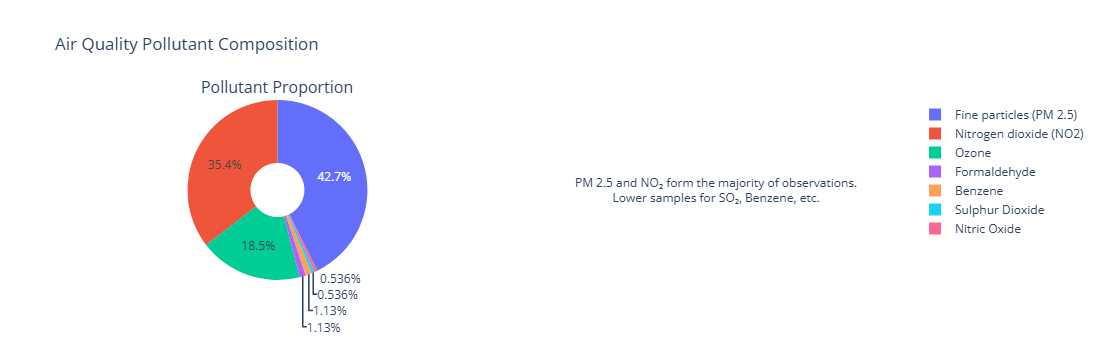

Insights
Approximately 78.1% of all pollutant records are associated with Fine Particles (PM2.5) and Nitrogen Dioxide (NO₂), indicating that these two pollutants dominate New York City’s air quality profile.


In [12]:
pollutant_count = data['Pollutant'].value_counts().reset_index(name = 'count')
pollutant_count.columns = ['Pollutant', 'Count']

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], 
                    specs=[[{"type": "domain"}, {"type": "xy"}]],
                    subplot_titles=["Pollutant Proportion", ""]) 

# Add pie chart to the first column (left)
fig.add_trace(go.Pie(
    labels=pollutant_count['Pollutant'],
    values=pollutant_count['Count'],
    hole=0.3,
    name="Pollutant Pie"
), row=1, col=1)

# Update layout
fig.update_layout(
    title_text="Air Quality Pollutant Composition",
    showlegend=True
)

fig.add_annotation(
    text="PM 2.5 and NO₂ form the majority of observations.<br>Lower samples for SO₂, Benzene, etc.",
    xref="paper", yref="paper",
    x=0.95, y=0.5,
    showarrow=False,
    font=dict(size=12)
)

fig.show()

print("\033[1mInsights\033[0m")
print("Approximately 78.1% of all pollutant records are associated with Fine Particles (PM2.5) and Nitrogen Dioxide (NO₂), indicating that these two pollutants dominate New York City’s air quality profile.")

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### Implication
Targeting PM2.5, Ozone(O3) and NO₂ reductions can yield the greatest overall impact in improving air quality and mitigating pollution-related health risks.

### How have pollutant levels (PM2.5, NO₂, O₃) changed over time and by season?

#####  Year-over-year changes in pollutant concentrations

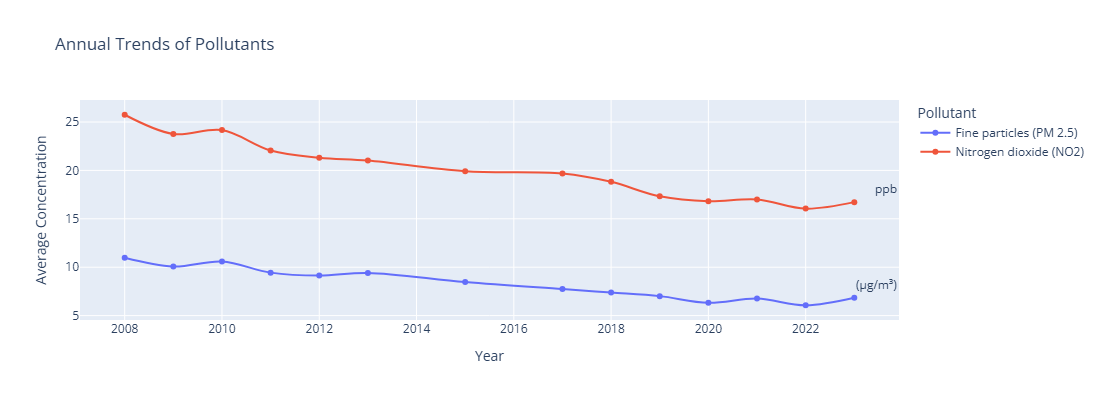

In [13]:
## Extract Season 

def season(row):
    if "Summer" in row['Time Period']:
        return "Summer"
    elif "Winter" in row['Time Period']:
        return "Winter"
    elif "Annual Average" in row['Time Period']:
        return "Annual Average"
    else:
        return None

data['Season'] = data.apply(season, axis = 1) 

## Grouping 
air_quality_year_over_year = data[(data['Measure'] == 'Mean') & (data['Season'] == 'Annual Average')].groupby(['Year', 'Pollutant'], as_index=False)['Data Value'].mean()

## Plot
fig = px.line(
    air_quality_year_over_year,
    x='Year',
    y='Data Value',
    color='Pollutant',
    line_shape='spline',    
    markers=True,           
    title='Annual Trends of Pollutants',
    labels={
        'Data Value': 'Average Concentration',
        'Year': 'Year',
        'Pollutant': 'Pollutant'
    },
    height = 400, width = 900
)

fig.update_layout(
    legend_title_text='Pollutant',
    hovermode='x unified'
)

fig.add_annotation(
    text="(µg/m³)",
    xref="paper", yref="paper",
    x=1, y=0.12,
    showarrow=False,
    font=dict(size=12)
)

fig.add_annotation(
    text="ppb",
    xref="paper", yref="paper",
    x=1, y=0.6,
    showarrow=False,
    font=dict(size=12)
)

fig.show()

#### Insights
- In 2023, **average annual concentrations** of **PM₂.₅** and **NO₂** fell by approximately **40–41%** compared to 2008 levels.
   - **PM₂.₅** declined from roughly 11 µg/m³ in 2008 to around 6–7 µg/m³ in 2023.
   - **NO₂** dropped from about 26 ppb to the 16–17 ppb range over the same period.

These reductions align closely with official New York City data showing a **40% decrease in PM₂.₅** and **38% decrease in NO₂** since 2010—evidence of sustained air-quality improvement efforts
970

##### Seasonal variation in levels of PM2.5, NO₂, and O₃

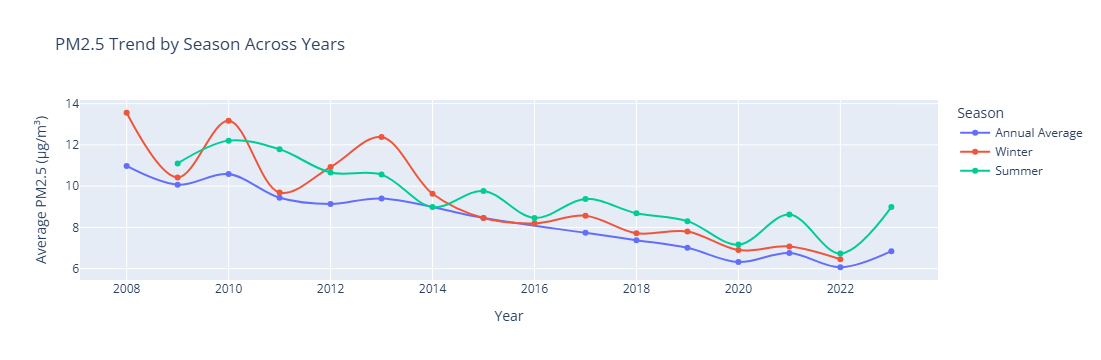

 Insights
1. From ~11 µg/m³ in 2008 to ~6.8 µg/m³ in 2023 (annual average).
2. Winter shows marked peaks, e.g. ~13.5 µg/m³ in 2008 and ~12.4 µg/m³ in 2013.
3. Summer levels have been flat around 8–9 µg/m³ since 2015, rising to ~9 µg/m³ in 2023.
4. Notice a summer rise to ~9 µg/m³ in 2023. Could indicate emerging sources (e.g. construction, traffic).


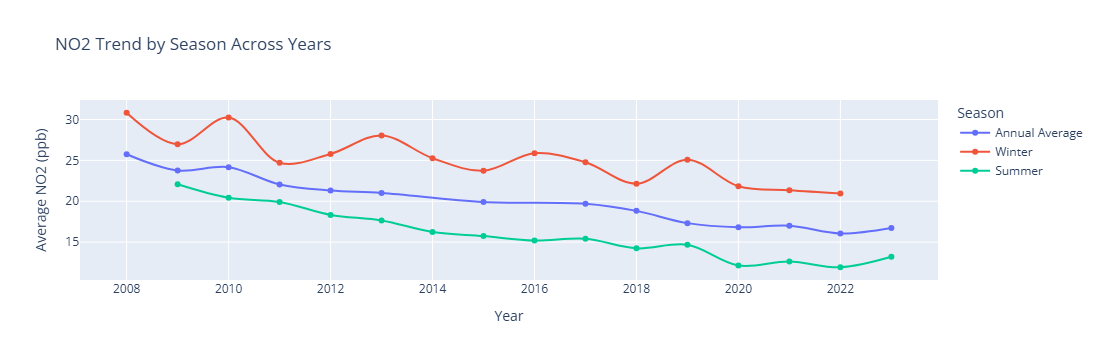

Insights
1. NO₂ annual average fell from ~25 ppb in 2008 to ~17 ppb by 2023.
2. Consistent winter spikes (~31 ppb in 2008, ~25–30 ppb in 2010–14) reflect heating and stable atmospheric conditions that trap pollutants.
3. Summer averages started ~22 ppb in 2009, then declined to ~12–14 ppb by 2023 well below winter levels.
4. Winter NO₂ remains ~1.5–2× higher than summer—consistent with global and regional satellite observations.
5. Summer levels have plateaued around ~12–14 ppb, suggesting that further reductions will require targeting non‑heating sources like traffic.


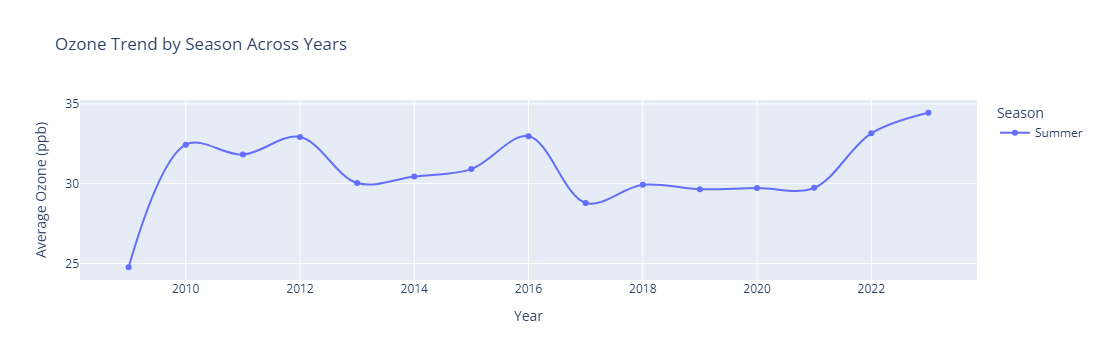

Insights
1. Summer Ozone rose from ~25 ppb in 2009 to ~34–35 ppb by 2023.
2. Prolonged Ozone > ~60 ppb is linked to respiratory harm and agricultural stress—cities like Delhi hit hazardous summer levels in recent years.S


In [37]:
##----------------------------------------------------------- Group and calculate average PM2.5 by Year and Season

pm_trend = data[data['Pollutant'] == 'Fine particles (PM 2.5)'].groupby(
    ['Year', 'Season']
)['Data Value'].mean().reset_index()

# Plot line chart
fig2 = px.line(
    data_frame=pm_trend,
    x='Year',
    y='Data Value',
     line_shape='spline',
    color='Season',
    markers=True,
    title='PM2.5 Trend by Season Across Years',
    labels={'Data Value': 'PM2.5 (µg/m³)', 'Season': 'Season'}
)
fig2.update_layout(yaxis_title='Average PM2.5 (µg/m³)', xaxis_title='Year')

fig2.show()
print(' \033[1mInsights\033[0m')
print('1. From ~11 µg/m³ in 2008 to ~6.8 µg/m³ in 2023 (annual average).')
print('2. Winter shows marked peaks, e.g. ~13.5 µg/m³ in 2008 and ~12.4 µg/m³ in 2013.')
print('3. Summer levels have been flat around 8–9 µg/m³ since 2015, rising to ~9 µg/m³ in 2023.')
print('4. Notice a summer rise to ~9 µg/m³ in 2023. Could indicate emerging sources (e.g. construction, traffic).')

## ---------------------------------------------------------- Group and calculate average NO2 by Year and Season

no2_trend = data[data['Pollutant'] == 'Nitrogen dioxide (NO2)'].groupby(
    ['Year', 'Season']
)['Data Value'].mean().reset_index()

# Plot line chart
fig3 = px.line(
    data_frame=no2_trend,
    x='Year',
    y='Data Value',
     line_shape='spline',
    color='Season',
    markers=True,
    title='NO2 Trend by Season Across Years',
    labels={'Data Value': 'NO2 (ppb)', 'Season': 'Season'}
)
fig3.update_layout(yaxis_title='Average NO2 (ppb)', xaxis_title='Year')

fig3.show()
print('\033[1mInsights\033[0m')
print('1. NO₂ annual average fell from ~25 ppb in 2008 to ~17 ppb by 2023.')
print('2. Consistent winter spikes (~31 ppb in 2008, ~25–30 ppb in 2010–14) reflect heating and stable atmospheric conditions that trap pollutants.')
print('3. Summer averages started ~22 ppb in 2009, then declined to ~12–14 ppb by 2023 well below winter levels.')
print('4. Winter NO₂ remains ~1.5–2× higher than summer—consistent with global and regional satellite observations.')
print('5. Summer levels have plateaued around ~12–14 ppb, suggesting that further reductions will require targeting non‑heating sources like traffic.')

##--------------------------------------------------------- Group and calculate average Ozone by Year and Season

ozone_trend = data[data['Pollutant'] == 'Ozone'].groupby(
    ['Year', 'Season']
)['Data Value'].mean().reset_index()

# Plot line chart
fig3 = px.line(
    data_frame=ozone_trend,
    x='Year',
    y='Data Value',
     line_shape='spline',
    color='Season',
    markers=True,
    title='Ozone Trend by Season Across Years',
    labels={'Data Value': 'Ozone (ppb)', 'Season': 'Season'}
)
fig3.update_layout(yaxis_title='Average Ozone (ppb)', xaxis_title='Year')

fig3.show()
print('\033[1mInsights\033[0m')
print('1. Summer Ozone rose from ~25 ppb in 2009 to ~34–35 ppb by 2023.')
print('2. Prolonged Ozone > ~60 ppb is linked to respiratory harm and agricultural stress—cities like Delhi hit hazardous summer levels in recent years.S')

## Focus Area: *Geographic Disparities*

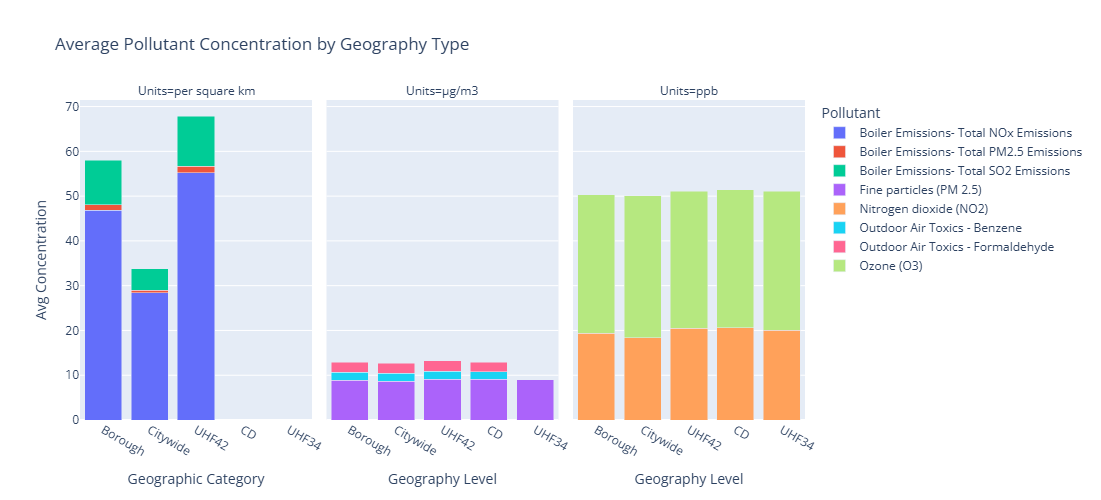

Insights
1. UHF42 show the highest boiler emissions (NOx, SO2, PM2.5) per km², significantly above Borough and citywide.
2. Moving from UHF42 → Borough → CityWide, emission intensity drops
3. Average PM2.5 levels in µg/m³ remain fairly consistent across geography types below 10 µg/m³
4. Similiarly, Average Outdoor Air toxics (Benzene, Formaldehyde) in µg/m³ remain fairly consistent across geography types ~1-3 µg/m³.
5. NO₂ (~19–20 ppb) and O₃ (~30–31 ppb) show little variation across scales.
  


In [41]:
df = data[data['category'] == 'Pollutant']

##  Group by borough (Geo Type Name: Borough)
dff = df.groupby(['Geo Type Name','Name', 'Measure Info'])['Data Value'].mean().reset_index(name = 'avg_concentration')


# Group data and compute average concentration
dff = df.groupby(
    ['Geo Type Name', 'Name', 'Measure Info']
)['Data Value'].mean().reset_index(name='avg_concentration')

# Create stacked bar chart
fig = px.bar(
    dff,
    x='Geo Type Name',
    y='avg_concentration',
    color='Name',                  # pollutant names determine stack segments
    barmode='stack',              # stacked bars
    facet_col='Measure Info',     # separate panels for different units (µg/m³, ppb, etc.)
    labels={
        'Geo Type Name': 'Geography Level',
        'avg_concentration': 'Avg Concentration',
        'Name': 'Pollutant',
        'Measure Info': 'Units'
    },
    title='Average Pollutant Concentration by Geography Type',
    height=500, width=1150
    
)

fig.update_layout(
    legend_title_text='Pollutant',
    xaxis=dict(title='Geographic Category')
)

fig.show()
print('\033[1mInsights\033[0m')
print('1. UHF42 show the highest boiler emissions (NOx, SO2, PM2.5) per km², significantly above Borough and citywide.')
print('2. Moving from UHF42 → Borough → CityWide, emission intensity drops')
print('3. Average PM2.5 levels in µg/m³ remain fairly consistent across geography types below 10 µg/m³')
print('4. Similiarly, Average Outdoor Air toxics (Benzene, Formaldehyde) in µg/m³ remain fairly consistent across geography types ~1-3 µg/m³.')
print('5. NO₂ (~19–20 ppb) and O₃ (~30–31 ppb) show little variation across scales.')
print('  ')

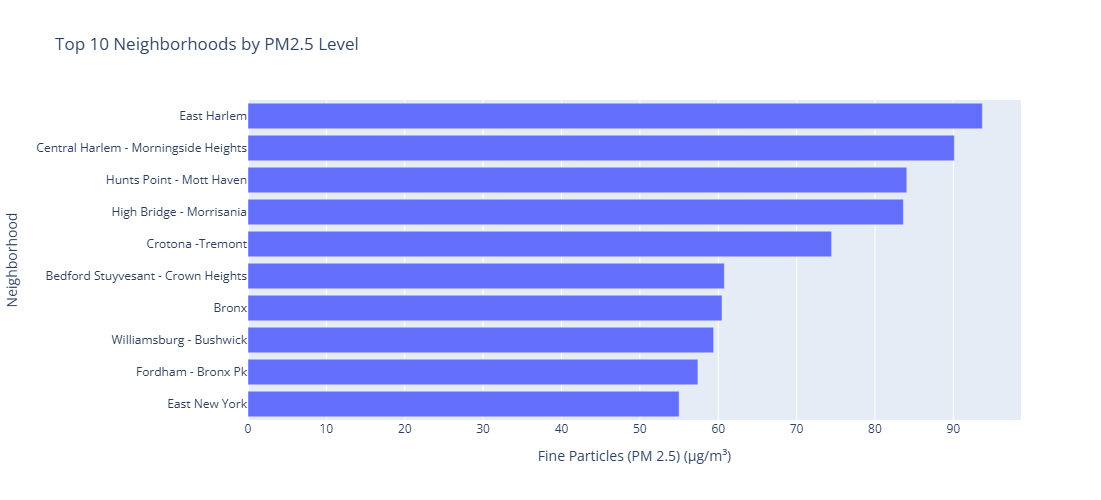

In [16]:
# Filter for PM2.5 pollutants
pm25 = data[data['Name'].str.contains('PM2.5', case=False, na=False)]

# --- Neighborhood-Level Comparison (Top 10 neighborhoods) ---

nbhd_pm25 = pm25.groupby('Geo Place Name')['Data Value'].mean().reset_index(name='Average')

# Select top 10 most polluted neighborhoods
top10_nbhd = nbhd_pm25.nlargest(10, 'Average')

fig_nbhd = px.bar(
    top10_nbhd.sort_values('Average', ascending=True),
    x='Average', y='Geo Place Name',
    orientation='h',
    title='Top 10 Neighborhoods by PM2.5 Level',
    labels={'Average': 'Fine Particles (PM 2.5) (µg/m³)', 'Geo Place Name': 'Neighborhood'},
    height=500, width = 800
)

fig_nbhd.show()

#### Insights
- **East Harlem and Central Harlem** show the **highest average PM(2.5) exposure 90-93 µg/m³**.
- **Hunts Point-Mott Haven and High bridge- Morrisania** show the average PM(2.5) exposure **above 80 µg/m³**.

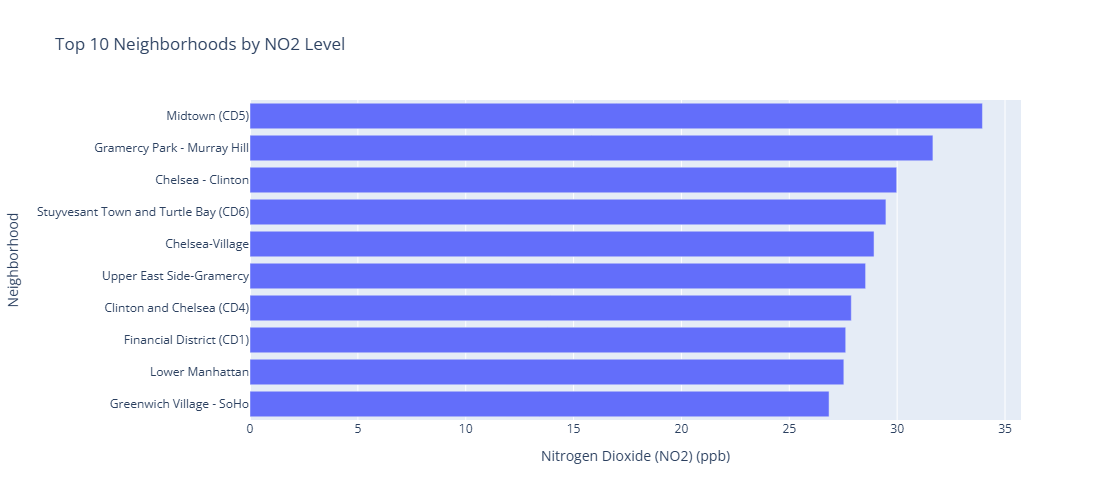

In [17]:
# Filter for NO2 pollutants
no2 = data[data['Name'].str.contains('NO2')]

# --- Neighborhood-Level Comparison (Top 10 neighborhoods) ---

nbhd_no2 = (
    no2.groupby('Geo Place Name')['Data Value']
    .mean()
    .reset_index(name='avg_no2')
)

# Select top 10 most polluted neighborhoods
top10_nbhd1 = nbhd_no2.nlargest(10, 'avg_no2')

fig_nbhd1 = px.bar(
    top10_nbhd1.sort_values('avg_no2', ascending=True),
    x='avg_no2', y='Geo Place Name',
    orientation='h',
    title='Top 10 Neighborhoods by NO2 Level',
    labels={'avg_no2': 'Nitrogen Dioxide (NO2) (ppb)', 'Geo Place Name': 'Neighborhood'},
    height=500, width = 800
)
fig_nbhd1.show()


#### Insights
- **Midtown(CD5) and Gramercy Park-Murray Hill** show the **highest average NO2 exposure 31-34ppb** above the lowest-ranked neighborhoods i.e. below 30ppb.

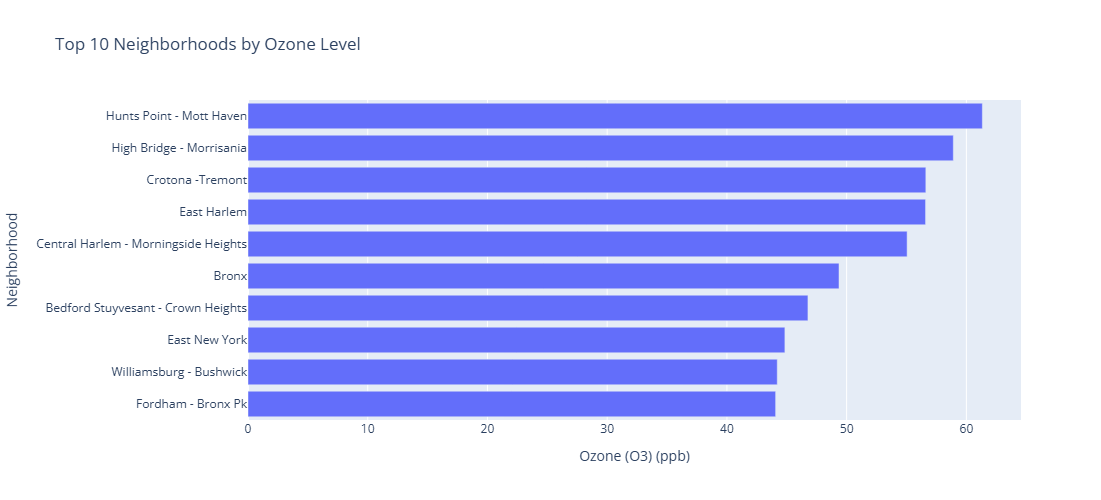

In [18]:
# Filter for Ozone pollutants
ozone = data[data['Name'].str.contains('ozone', case = False, na =False)]

# --- Neighborhood-Level Comparison (Top 10 neighborhoods) ---

nbhd_ozone = (
    ozone.groupby('Geo Place Name')['Data Value']
    .mean()
    .reset_index(name='avg_ozone')
)

# Select top 10 most polluted neighborhoods
top10_nbhd2 = nbhd_ozone.nlargest(10, 'avg_ozone')

fig_nbhd3 = px.bar(
    top10_nbhd2.sort_values('avg_ozone', ascending=True),
    x='avg_ozone', y='Geo Place Name',
    orientation='h',
    title='Top 10 Neighborhoods by Ozone Level',
    labels={'avg_ozone': 'Ozone (O3) (ppb)', 'Geo Place Name': 'Neighborhood'},
    height=500, width = 800
)
fig_nbhd3.show()

#### Insights
- **Hunts Point-Mott Haven** show the highest average Ozone exposure **above 60ppb**.
- **High bridge- Morrisania, East Harlem, and Crotona - Tremont** show the **highest average Ozone exposure around 50-60ppb**.

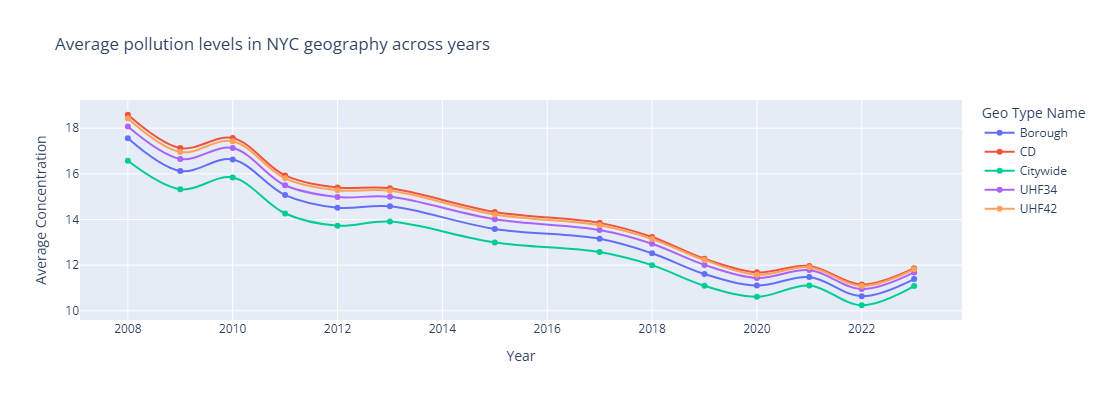

Insights
1. Across all geography types—boroughs, CDs, UHF zones, citywide average pollution dropped steadily from ~18–19 µg/m³ in 2008 to ~12 µg/m³ by 2022–23, reflecting ~30–35% improvement overall
2. However, average concentration level rises in 2010, the gradually decrease in pollution level with slight increase in 2021 and 2023.


In [42]:
### We compare pollution levels across NYC geography.

def annual_concentration(row):
    if "Annual Average" in row['Time Period']:
        return "Annual Average"
    else:
        return None

data['annual'] = data.apply(annual_concentration, axis =1)
annual_data = data[data['annual'] == 'Annual Average']
annual_trend = (
    annual_data
    .groupby(['Year', 'Geo Type Name'], as_index=False)['Data Value']
    .mean()
)

## Plot 
fig = px.line(
    annual_trend,
    x='Year',
    y='Data Value',
    color='Geo Type Name',
    line_shape='spline',    
    markers=True,           
    title='Average pollution levels in NYC geography across years',
    labels={
        'Data Value': 'Average Concentration',
        'Year': 'Year',
        'Geo Type Name': 'Geo Type Name'
    },
    height = 400, width = 900
)

fig.update_layout(
    legend_title_text='Geo Type Name',
    hovermode='x unified'
)
fig.show()

print('\033[1mInsights\033[0m')
print('1. Across all geography types—boroughs, CDs, UHF zones, citywide average pollution dropped steadily from ~18–19 µg/m³ in 2008 to ~12 µg/m³ by 2022–23, reflecting ~30–35% improvement overall.')
print('2. However, average concentration level rises in 2010, the gradually decrease in pollution level with slight increase in 2021 and 2023.')

### Travel‐related indicators


In [44]:
## Annual Miles traveled 

df = data[data['category'] == 'Travel Metrics']

travel_pivot = df.pivot_table(
    index='Year',
    columns='Name',
    values='Data Value',
    aggfunc='mean'
).reset_index()

travel_pivot.columns.name = None
travel_pivot = travel_pivot.rename(columns={
    'Annual vehicle miles traveled': 'Total Miles',
    'Annual vehicle miles traveled (cars)': 'Car Miles',
    'Annual vehicle miles traveled (trucks)': 'Truck Miles'
})

print('Annual Miles Traveled (Million Miles per Square Mile)')
travel_pivot


Annual Miles Traveled (Million Miles per Square Mile)


Year  Total Miles  Car Miles  Truck Miles
0  2005    67.176736  62.804116     3.765431
1  2010    73.142931  67.606539     3.417214
2  2019    79.966269  72.914251     4.475991

#### Insights
1. Total miles per square mile rose from ~67M in 2005 to ~80M in 2019—a ~19% increase.
2. Car miles grew from ~62.8M to ~72.9M (+16%).
3. Truck miles dipped between 2005–2010 (~3.8M → 3.4M), then rebounded to ~4.5M by 2019—a ≈19% rise post-recession.

## Focus Area: *Health Outcomes*
Are emergency visits, hospitalizations, and deaths increasing or decreasing?

In [21]:
health_stats = data[(data['category'] != 'Pollutant') & (data['category'] != 'Travel Metrics')]
health_stats.head(2)

Unique ID                                             Name  \
954     518940  Asthma emergency department visits due to PM2.5   
955     628507  Asthma emergency department visits due to PM2.5   

                             Measure        Measure Info Geo Type Name  \
954  Estimated annual rate (age 18+)  per 100,000 adults         UHF42   
955  Estimated annual rate (age 18+)  per 100,000 adults         UHF42   

       Geo Place Name Time Period Start_Date  Year     Month  Data Value  \
954  Crotona -Tremont   2012-2014 2012-02-01  2012  February  118.077027   
955   Upper East Side   2015-2017 2015-01-01  2015   January    6.600000   

                        category                Pollutant Season annual  
954  Emergency Department Visits  Fine particles (PM 2.5)   None   None  
955  Emergency Department Visits  Fine particles (PM 2.5)   None   None

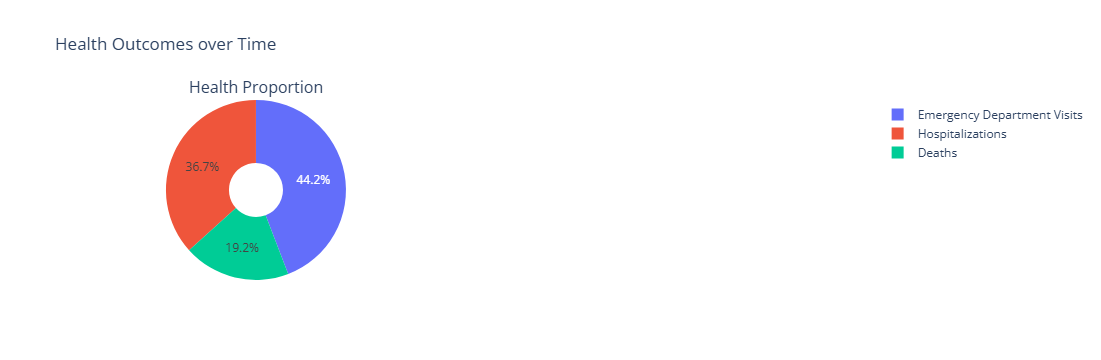

In [22]:
stats_count = health_stats['category'].value_counts().reset_index(name = 'count')
stats_count.columns = ['category', 'Count']

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], 
                    specs=[[{"type": "domain"}, {"type": "xy"}]],
                    subplot_titles=["Health Proportion", ""]) 

# Add pie chart to the first column (left)
fig.add_trace(go.Pie(
    labels=stats_count['category'],
    values=pollutant_count['Count'],
    hole=0.3,
    name="Category Pie"
), row=1, col=1)

# Update layout
fig.update_layout(
    title_text="Health Outcomes over Time",
    showlegend=True
)
fig.show()

#### Insights
- **Emergency Department Visits** represent the largest slice at **44%**.
- **Hospitalizations** follow closely at **37%**.
- **Deaths** account for 19%, smaller in frequency but most severe in impact.

####  Health Outcomes Over Time

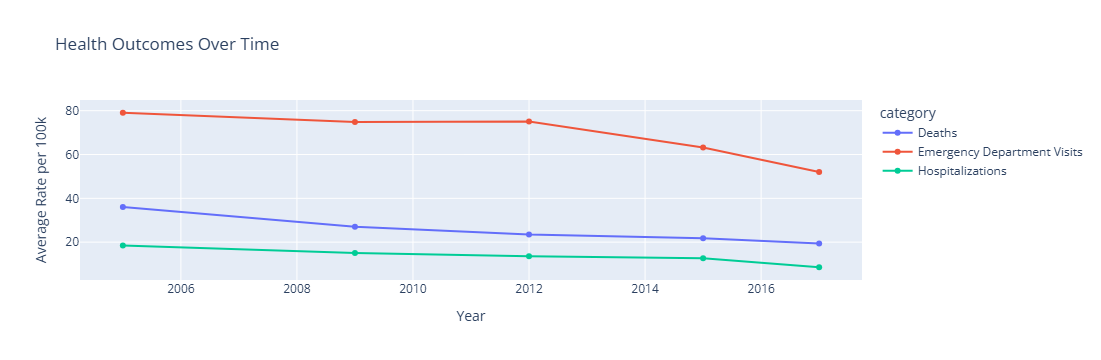

Insights
1. Asthama Emergency department (ED) visits decreased from ~79 to ~52 per 100,000, ~35% reduction, due to declining of PM2.5 and Ozone pollutants over the years.
2. Hospital admissions declined from ~18 to ~8 per 100,000 hospital data, aligning decrease in asthama, respiratory and cardiovascular hospitalizations.
3. Death rate dropped from ~36 to ~19 per 100,000 (2005→2017), indicating substantial long-term health improvements.
4. The downward trend mirrors air quality improvements in many regions.


In [46]:
## ------------------------------------------HEALTH OUTCOMES OVER TIME-------------------------------------------------
health_data = data[data['category'].isin(['Deaths', 'Hospitalizations', 'Emergency Department Visits'])]
health_trend = health_data.groupby(['Year', 'category'])['Data Value'].mean().reset_index()

fig1 = px.line(
    health_trend, x='Year', y='Data Value', color='category', markers=True,
    title='Health Outcomes Over Time',
    labels={'Data Value': 'Average Rate per 100k'}
)
fig1.show()

print('\033[1mInsights\033[0m')
print('1. Asthama Emergency department (ED) visits decreased from ~79 to ~52 per 100,000, ~35% reduction, due to declining of PM2.5 and Ozone pollutants over the years.')
print('2. Hospital admissions declined from ~18 to ~8 per 100,000 hospital data, aligning decrease in asthama, respiratory and cardiovascular hospitalizations.')
print('3. Death rate dropped from ~36 to ~19 per 100,000 (2005→2017), indicating substantial long-term health improvements.')
print('4. The downward trend mirrors air quality improvements in many regions.')

### Top-Risk Neighborhoods

### Emergency Department Visits 

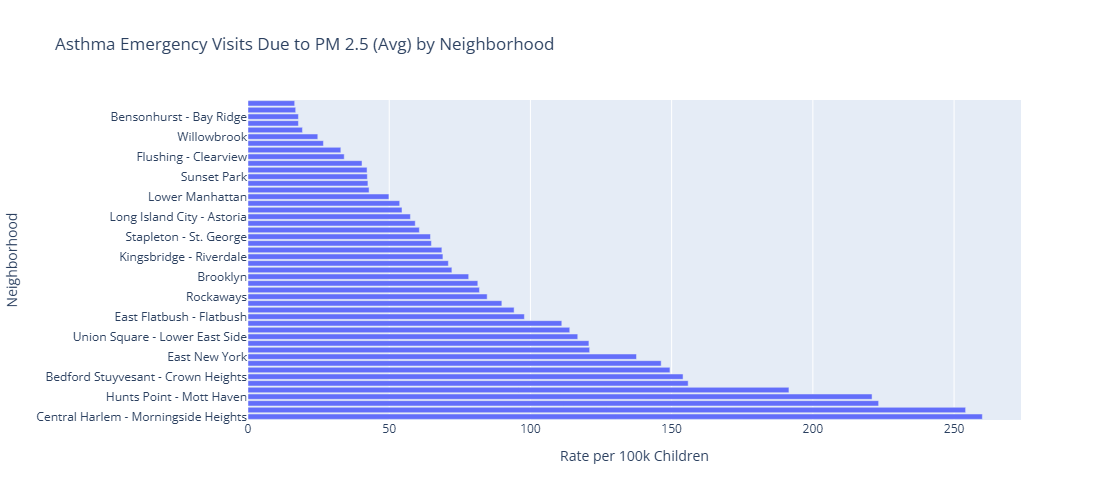

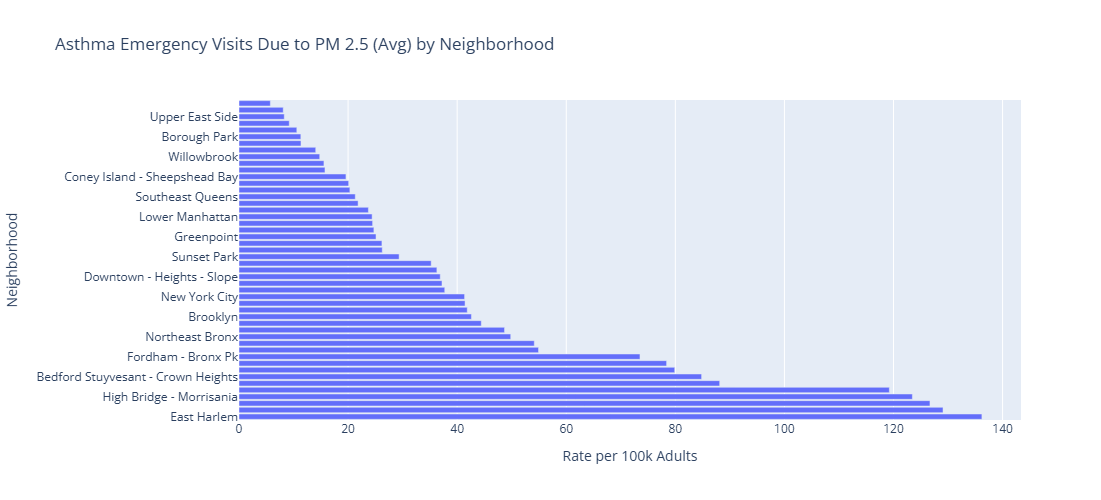

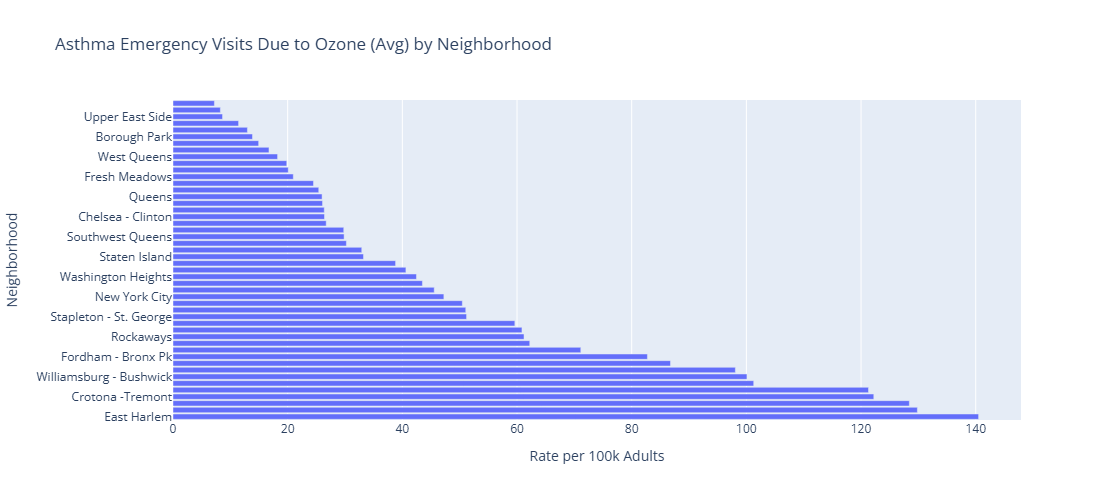

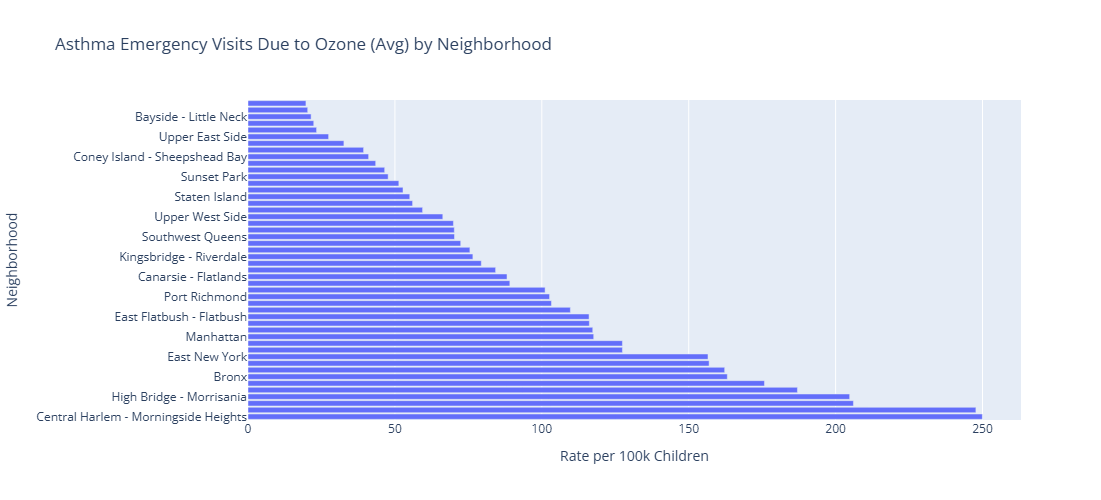

In [24]:
# Filter emergency visit data
ed_visits = data[(data['category'] == 'Emergency Department Visits') 
                  & 
                 (data['Pollutant']=='Fine particles (PM 2.5)') & (data['Measure Info'] == 'per 100,000 children')]
asthma_visits = ed_visits[ed_visits['Name'].str.contains('Asthma', na=False)]

# Group by neighborhood
asthma_geo = asthma_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig = px.bar(
    asthma_geo.sort_values('Data Value', ascending=False),
    x='Data Value',
    y='Geo Place Name',
    orientation='h',
    title='Asthma Emergency Visits Due to PM 2.5 (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Children', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =700
)
fig.show()
## --------------------------------------------------------------------------------------------------------------------------------------------
# Filter emergency visit data
ed2_visits = data[(data['category'] == 'Emergency Department Visits') 
                  & 
                 (data['Pollutant']=='Fine particles (PM 2.5)') & (data['Measure Info'] == 'per 100,000 adults')]
asthma2_visits = ed2_visits[ed2_visits['Name'].str.contains('Asthma', na=False)]

# Group by neighborhood
asthma2_geo = asthma2_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig3 = px.bar(
    asthma2_geo.sort_values('Data Value', ascending=False),
    x='Data Value',
    y='Geo Place Name',
    orientation='h',
    title='Asthma Emergency Visits Due to PM 2.5 (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Adults', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =700
)
fig3.show()
## -------------------------------------------------------------------------------------------------------------------------------------------------

# Filter for Ozone-related Emergency Department Visits
ed1_visits = data[
    (data['category'] == 'Emergency Department Visits') &
    (data['Pollutant'] == 'Ozone')& (data['Measure Info'] == 'per 100,000 adults')
]
# Further filter for Asthma-related visits
asthma1_visits = ed1_visits[ed1_visits['Name'].str.contains('Asthma', na=False)]

# Group by neighborhood and calculate average
asthma1_geo = asthma1_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig1 = px.bar(
    asthma1_geo.sort_values('Data Value', ascending=False),
    x='Data Value',
    y='Geo Place Name',
    orientation='h',
    title='Asthma Emergency Visits Due to Ozone (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Adults', 'Geo Place Name': 'Neighborhood'},
    height=500, width=700
)

fig1.show()
## -------------------------------------------------------------------------------------------------------------------------------------------------------
# Filter for Ozone-related Emergency Department Visits
ed12_visits = data[
    (data['category'] == 'Emergency Department Visits') &
    (data['Pollutant'] == 'Ozone')& (data['Measure Info'] == 'per 100,000 children')
]
# Further filter for Asthma-related visits
asthma12_visits = ed12_visits[ed12_visits['Name'].str.contains('Asthma', na=False)]

# Group by neighborhood and calculate average
asthma12_geo = asthma12_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig12 = px.bar(
    asthma12_geo.sort_values('Data Value', ascending=False),
    x='Data Value',
    y='Geo Place Name',
    orientation='h',
    title='Asthma Emergency Visits Due to Ozone (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Children', 'Geo Place Name': 'Neighborhood'},
    height=500, width=700
)

fig12.show()

### Hospitalizations

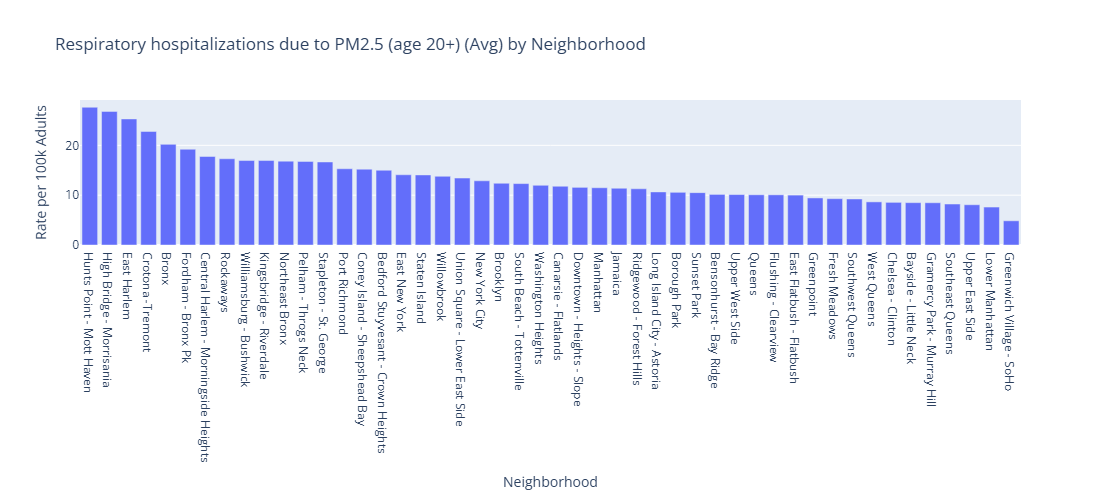

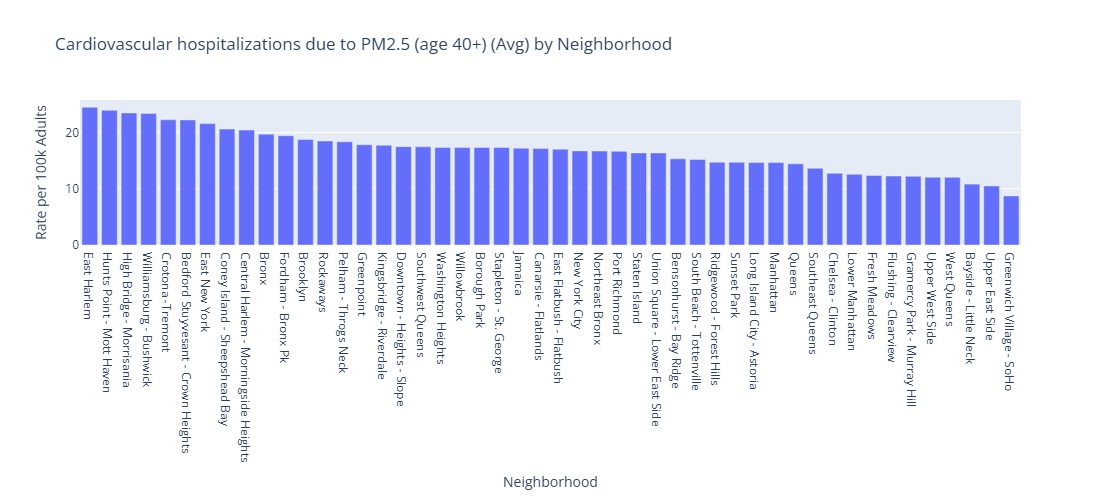

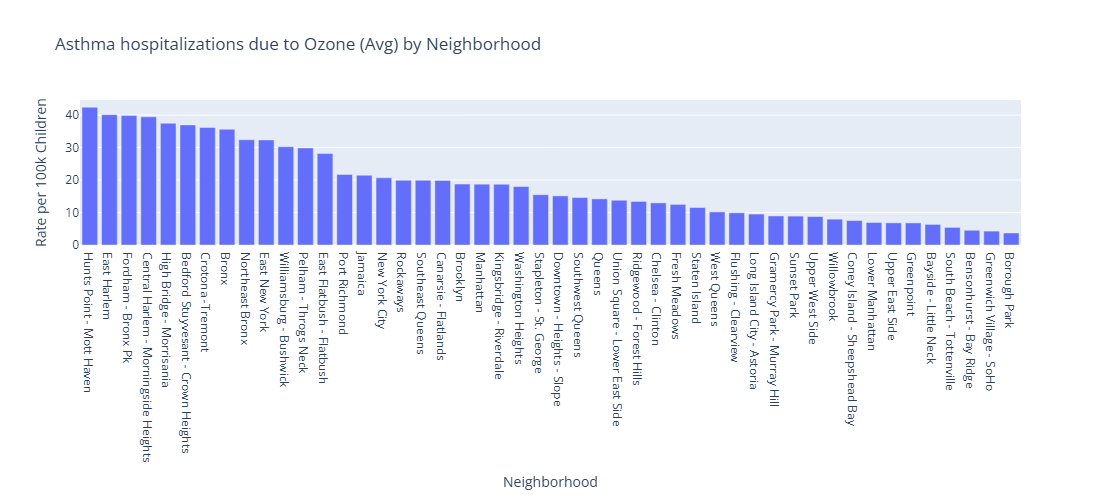

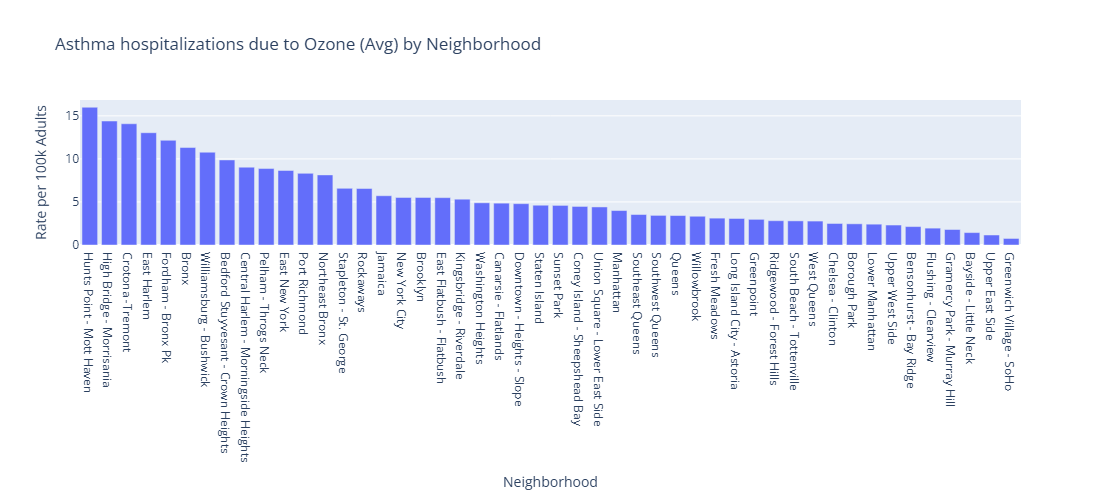

In [25]:
# Filter hospitalization data
## 'Respiratory hospitalizations due to PM2.5 (age 20+)
h_visits = data[(data['category'] == 'Hospitalizations') 
                  & 
                 (data['Name']=='Respiratory hospitalizations due to PM2.5 (age 20+)')& (data['Measure Info'] == 'per 100,000 adults')]

# Group by neighborhood
hos_geo = h_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig = px.bar(
    hos_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Respiratory hospitalizations due to PM2.5 (age 20+) (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Adults', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =1000
)
fig.show()

# Filter for Cardiovascular hospitalizations due to PM2.5 (age 40+)
h1_visits = data[
    (data['category'] == 'Hospitalizations') &
    (data['Name'] == 'Cardiovascular hospitalizations due to PM2.5 (age 40+)')& (data['Measure Info'] == 'per 100,000 adults')
]

# Group by neighborhood and calculate average
hop1_geo = h1_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig1 = px.bar(
    hop1_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Cardiovascular hospitalizations due to PM2.5 (age 40+) (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Adults', 'Geo Place Name': 'Neighborhood'},
    height=500, width=1000
)

fig1.show()

## 'Asthma hospitalizations due to Ozone' per 100K children
h2_visits = data[(data['category'] == 'Hospitalizations') 
                  & 
                 (data['Name']=='Asthma hospitalizations due to Ozone')& (data['Measure Info'] == 'per 100,000 children')]

# Group by neighborhood
hos1_geo = h2_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig3 = px.bar(
    hos1_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Asthma hospitalizations due to Ozone (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Children', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =1000
)
fig3.show()

## 'Asthma hospitalizations due to Ozone' per 100K adults
h21_visits = data[(data['category'] == 'Hospitalizations') 
                  & 
                 (data['Name']=='Asthma hospitalizations due to Ozone') & (data['Measure Info'] == 'per 100,000 adults')]

# Group by neighborhood
hos11_geo = h21_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig4 = px.bar(
    hos11_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Asthma hospitalizations due to Ozone (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k Adults', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =1000
)
fig4.show()

### Deaths

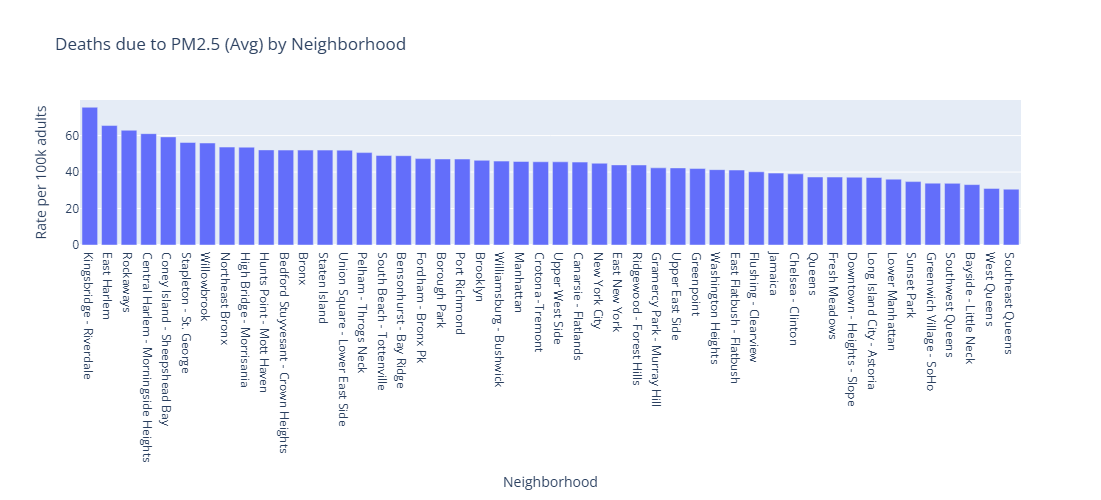

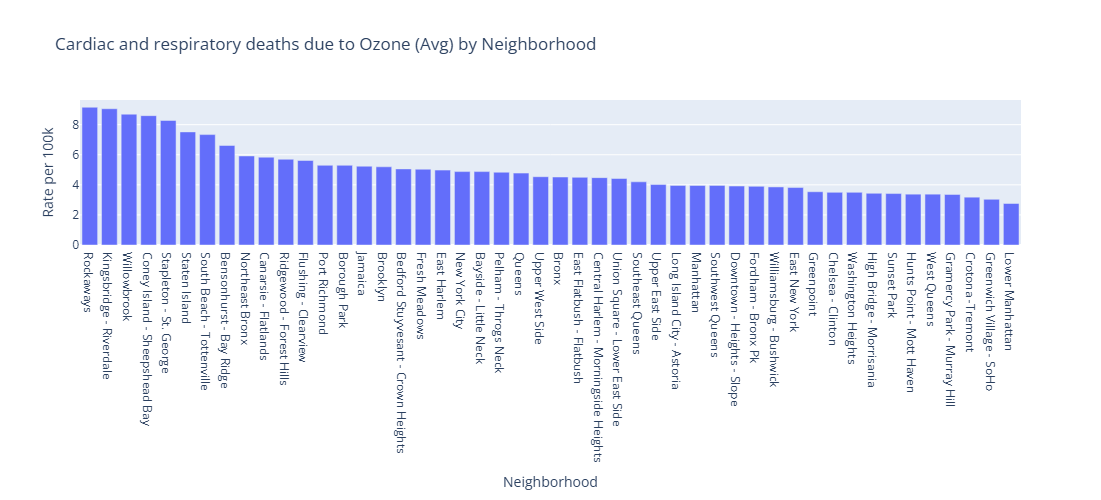

In [26]:
## Deaths due to PM2.5
h_visits = data[(data['category'] == 'Deaths') 
                  & 
                 (data['Name']=='Deaths due to PM2.5') & (data['Measure Info'] == 'per 100,000 adults')]

# Group by neighborhood
hos_geo = h_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig = px.bar(
    hos_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Deaths due to PM2.5 (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k adults', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =1000
)
fig.show()
## --------------------------------------------------------------------------------------------------------------------------------------------------
## 'Cardiac and respiratory deaths due to Ozone
h_visits = data[(data['category'] == 'Deaths') 
                  & 
                 (data['Name']=='Cardiac and respiratory deaths due to Ozone') & (data['Measure Info'] == 'per 100,000')]

# Group by neighborhood
hos_geo = h_visits.groupby('Geo Place Name')['Data Value'].mean().reset_index()

fig = px.bar(
    hos_geo.sort_values('Data Value', ascending=False),
    y='Data Value',
    x='Geo Place Name',
    title='Cardiac and respiratory deaths due to Ozone (Avg) by Neighborhood',
    labels={'Data Value': 'Rate per 100k', 'Geo Place Name': 'Neighborhood'},
    height = 500, width =1000
)
fig.show()


#### Which pollutants are most associated with asthma, cardiovascular, or respiratory conditions?

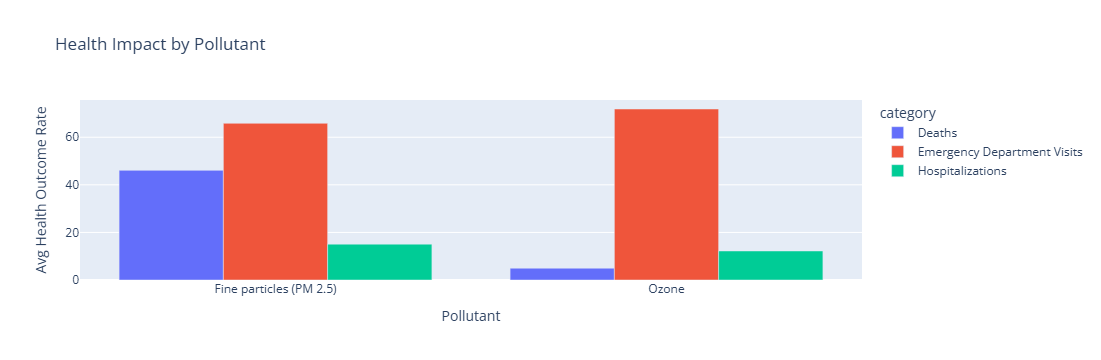

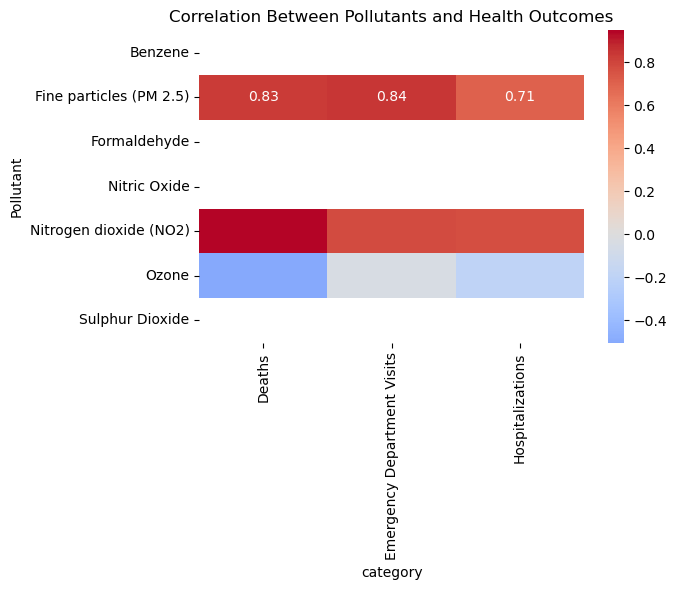

In [27]:
## ------------------------------------------------HEALTH IMPACT BY POLLUTANT-------------------------------------------
pollutant_impact = health_data[health_data['Pollutant'].notna()]
pollutant_summary = pollutant_impact.groupby(['Pollutant', 'category'])['Data Value'].mean().reset_index()

fig2 = px.bar(
    pollutant_summary, x='Pollutant', y='Data Value', color='category', barmode='group',
    title='Health Impact by Pollutant',
    labels={'Data Value': 'Avg Health Outcome Rate'}
)
fig2.show()

# Prepare pollutant and health outcome yearly averages
pollutant_data = data[data['category'] == 'Pollutant']
pollution_yearly = pollutant_data.groupby(['Year', 'Pollutant'])['Data Value'].mean().reset_index()
pollution_pivot = pollution_yearly.pivot(index='Year', columns='Pollutant', values='Data Value')

health_yearly = health_data.groupby(['Year', 'category'])['Data Value'].mean().reset_index()
health_pivot = health_yearly.pivot(index='Year', columns='category', values='Data Value')

combined = pollution_pivot.merge(health_pivot, left_index=True, right_index=True)
corr_matrix = combined.corr()
poll_cols = pollution_pivot.columns
health_cols = health_pivot.columns
correlation_subset = corr_matrix.loc[poll_cols, health_cols]

# Plot heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Pollutants and Health Outcomes')
plt.tight_layout()
plt.show()